# Data Visualization

## Matplotlib

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

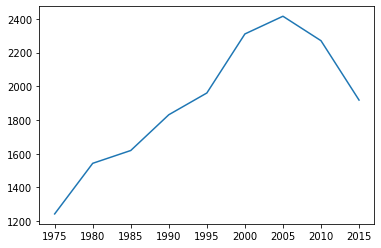

In [2]:
years_x = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015]
total_y = [1243, 1543, 1619, 1831, 1960, 2310, 2415, 2270, 1918]

plt.plot(years_x, total_y)
plt.show() # Will open a graph window.
           # Wait for it to be closed to continue script execution

### Save Figure Using .savefig()

You need to have the .savefig() in the same code box in the notebook for it to work. 

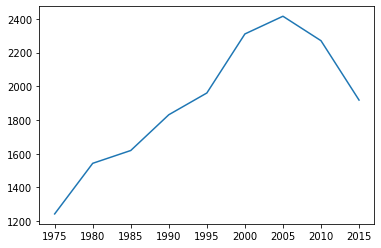

In [3]:
plt.plot(years_x, total_y)
plt.savefig('save_files/carbon.png')
plt.show()

### Widgets

You can use ipywidgets for interactive graphs

In [4]:
!pip install -q ipywidgets

In [5]:
# enable interactivity in your notebook
%matplotlib widget 

# get back to normal mode
%matplotlib inline 

Warning: with widgets, you might encounter compatibility issues. We recommend you to use it only when needed.

You don't need to type plt.show() in a notebook context. 

ake sure to use ; at the final line to avoid printing its output.

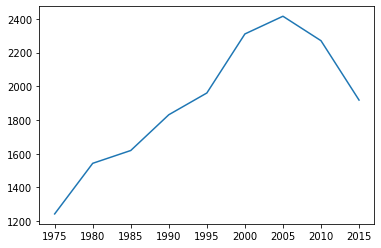

In [6]:
plt.plot(years_x, total_y);

### Matplotlib Basics

Methods to call before plt.show() to enrich the plot.

#### Title

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html

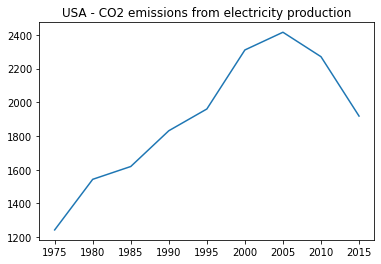

In [7]:
plt.title("USA - CO2 emissions from electricity production")
plt.plot(years_x, total_y);

#### Axis labels

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html

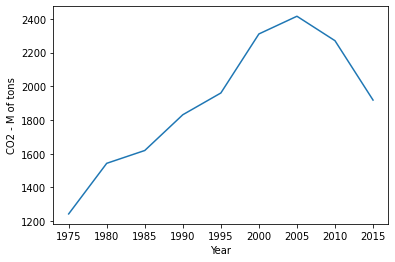

In [8]:
plt.xlabel("Year")
plt.ylabel("CO2 - M of tons")
plt.plot(years_x, total_y);

#### Axis Ticks

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.yticks.html

Let's add two more lines for Coal and Natural gas production:

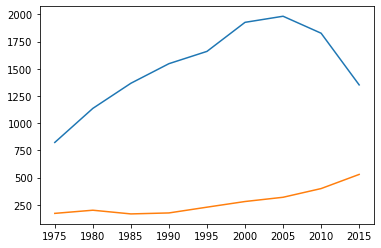

In [9]:
coal_y = [823, 1136, 1367, 1547, 1660, 1927, 1983, 1827, 1352]
gas_y = [171, 200, 166, 175, 228, 280, 319, 399, 529]

plt.plot(years_x, coal_y);
plt.plot(years_x, gas_y);


#### Legend

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

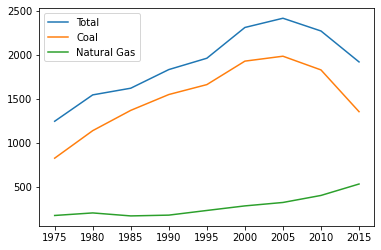

In [10]:
# First you need to add labels to each plot:

plt.plot(years_x, total_y, label="Total");
plt.plot(years_x, coal_y, label="Coal");
plt.plot(years_x, gas_y, label="Natural Gas");

# Then call:

plt.legend(loc="best");


#### Grid

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.grid.html

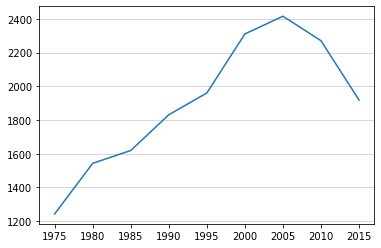

In [11]:
plt.plot(years_x, total_y);
plt.grid(axis="y", linewidth=0.5);

#### Styles

Matplotlib comes with many style sheets to customize the look & feel of your graph.

https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

In [12]:
print(sorted(plt.style.available))


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


#### Using a style

In a Python script:

In [13]:
# After `matplotlib` import:

# plt.style.use('seaborn')

# plt.plot(years_x, total_y);

In a Notebook, isolate the configuration to one plot to not pollute the whole context:

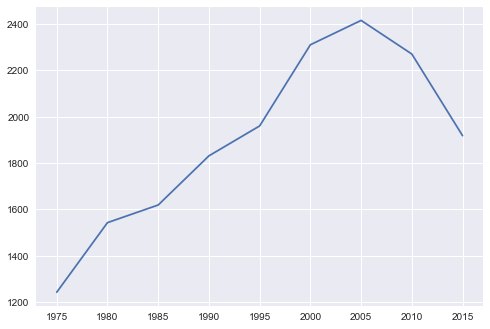

In [14]:
with plt.style.context('seaborn'):
    plt.plot(years_x, total_y)
    plt.show()

#### Lines

You have total control over the matplotlib.lines.Line2D:

    color (cycled, see plt.rcParams['axes.prop_cycle'])
    marker (default: None)
    linestyle (default: "-")
    linewidth (default: 1.5)



https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html

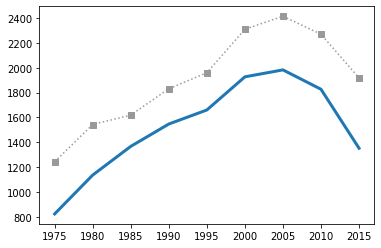

In [15]:
plt.plot(years_x, total_y, color="#999999", linestyle=':', marker='s')
plt.plot(years_x, coal_y, linewidth=3)

#### Figure Size

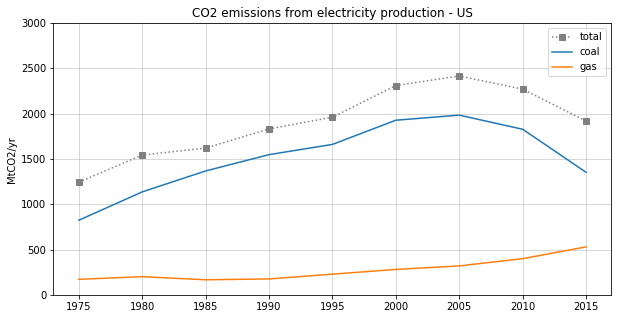

In [16]:
plt.figure(figsize=(10,5))  # <== changing the figure size

# 3 lines plot
plt.plot(years_x, total_y, label='total', c="grey", ls=':', marker='s')
plt.plot(years_x, coal_y, label='coal')
plt.plot(years_x, gas_y, label='gas')
# Decoration
plt.legend()
plt.title('CO2 emissions from electricity production - US')
plt.ylim((0,3000))
plt.ylabel('MtCO2/yr')
plt.grid(lw=0.5)

plt.show()

### Matplotlib Advanced

#### Axes vs Axis

    Axis is the axis of the plot, the thing that gets ticks and tick labels.
    The axes is the area your plot appears in.
    
You can access the current Axes instance with matplotlib.pyplot.gca

https://matplotlib.org/api/axes_api.html

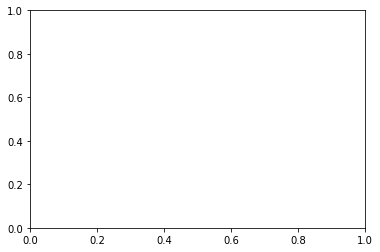

In [17]:
ax = plt.gca()

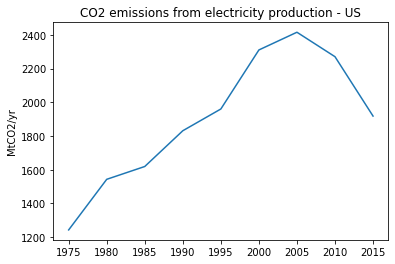

In [18]:
# Let's take this simple example

plt.plot(years_x, total_y)
plt.ylabel('MtCO2/yr')
plt.title('CO2 emissions from electricity production - US')
plt.show()

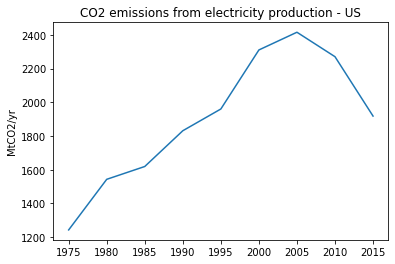

In [19]:
# And compare it with this one
plt.plot(years_x, total_y)
# Access the ax first
ax = plt.gca() 
# then change its properties  
ax.set_title('CO2 emissions from electricity production - US')
ax.set_ylabel('MtCO2/yr')
plt.show()

⚠️ Notice the difference:

    matplotlib.pyplot.title
    matplotlib.axes.Axes.set_title

🤔 Why would we want to access the ax?

    For finetuning / customizing
    When creating multiple subplots
    For integration with other libraries (Pandas etc...)




#### Finetune axes' Spines

You can remove a spine (or set a specific color!) with Spine.set_color:

{'left': <matplotlib.spines.Spine object at 0x13118a580>, 'right': <matplotlib.spines.Spine object at 0x13118a340>, 'bottom': <matplotlib.spines.Spine object at 0x13118a250>, 'top': <matplotlib.spines.Spine object at 0x13118a670>}




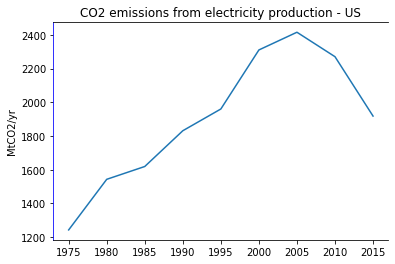

In [20]:
plt.plot(years_x, total_y)

# Access the ax first
ax = plt.gca()

# then change its properties  
ax.set_title('CO2 emissions from electricity production - US')
ax.set_ylabel('MtCO2/yr')

# You can remove a spine (or set a specific color!) with Spine.set_color:

ax.spines['right'].set_color(None)
ax.spines['left'].set_color("Blue")

print(dict(ax.spines))
print('\n')

plt.show()

You can also Spine.set_position:

https://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position

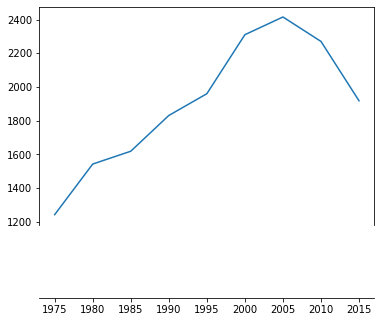

In [21]:
plt.plot(years_x, total_y)

# Access the ax first
ax = plt.gca()

ax.spines['bottom'].set_position(('axes', 0.5)) # half of y-axis

# or

ax.spines['bottom'].set_position(('data', 750)) # 750 on y-axis

plt.show()

#### Figures, Subplots and Axes

A figure in matplotlib means the whole window in the UI.

Within this figure there can be several subplots

Subplots are arranged and numberd in a (nrow, ncol) grid as below

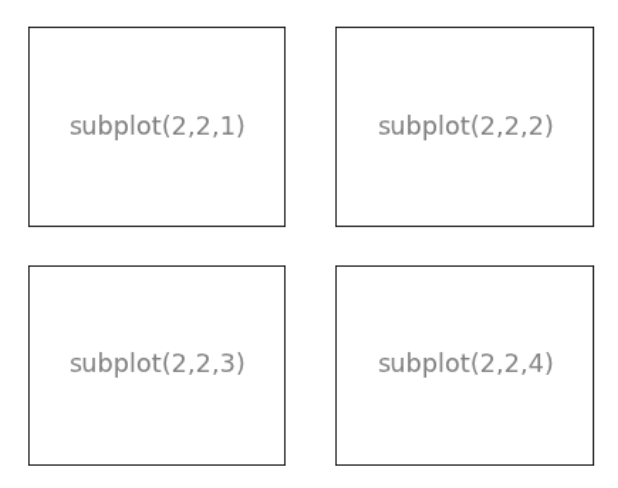



subplots belong the the Axes class: consider them equivalent at first order.

Only difference: You can create an ax without a subplot grid, by placing it in absolute position within a figure. 👉 stack overflow on axes vs. subplot

https://stackoverflow.com/a/43330553/7849552

##### State-based interface

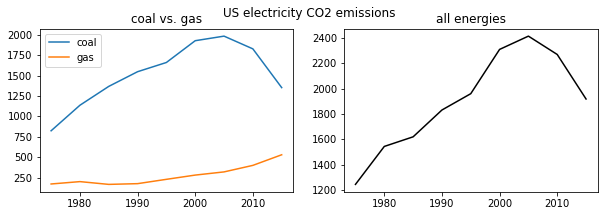

In [22]:
# Start a figure
plt.figure(figsize=(10,3))

# First subplot
plt.subplot(1,2,1)
plt.plot(years_x, coal_y, label="coal")
plt.plot(years_x, gas_y, label = "gas")
plt.title('coal vs. gas')
plt.legend()

# Second subplot
plt.subplot(1,2,2) 
plt.plot(years_x, total_y, label="total", c='black')
plt.title("all energies")

# Global figure methods
plt.suptitle('US electricity CO2 emissions')
plt.show()

##### Object-oriented interface

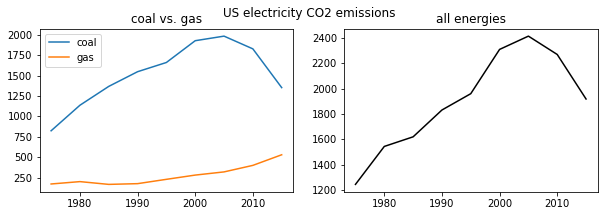

In [23]:
fig = plt.figure(figsize=(10,3))

# First subplot
ax1 = fig.add_subplot(1,2,1)
ax1.plot(years_x, coal_y, label="coal")
ax1.plot(years_x, gas_y, label = "gas")
ax1.set_title('coal vs. gas')
ax1.legend()

# Second subplot
ax2 = fig.add_subplot(1,2,2)
ax2.plot(years_x, total_y, c='black')
ax2.set_title('all energies')

# Global figure methods
fig.suptitle('US electricity CO2 emissions')
plt.show()


##### Destructuring assignment

Instead of

    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

You will often find in the offical docs the shortcut

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

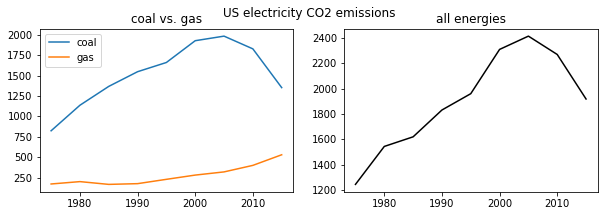

In [24]:
# Destructuring initialization
fig, axs = plt.subplots(1, 2, figsize=(10,3)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(years_x, coal_y, label="coal")
axs[0].plot(years_x, gas_y, label = "gas")
axs[0].set_title('coal vs. gas')
axs[0].legend()

# Second subplot
axs[1].plot(years_x, total_y, c='black')
axs[1].set_title('all energies')

# Global figure methods
plt.suptitle('US electricity CO2 emissions')
plt.show()

### Pandas

In [25]:
import pandas as pd
df = pd.DataFrame({ 'coal': coal_y, 'gas': gas_y }, index=years_x)
df

coal  gas
1975   823  171
1980  1136  200
1985  1367  166
1990  1547  175
1995  1660  228
2000  1927  280
2005  1983  319
2010  1827  399
2015  1352  529

#### 1 plots with pandas

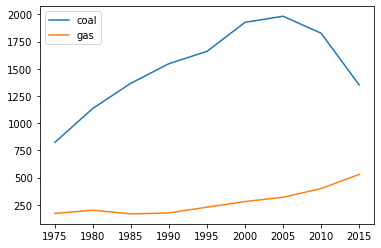

In [26]:
df.plot();

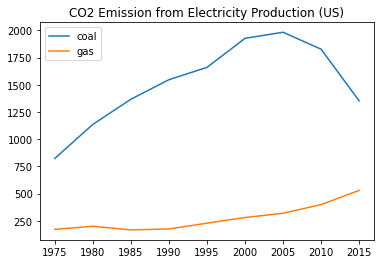

In [27]:
ax = df.plot()
ax.set_title('CO2 Emission from Electricity Production (US)')
ax;

In [28]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [29]:
type(ax).__bases__

(matplotlib.axes._subplots.SubplotBase, matplotlib.axes._axes.Axes)

⚠️ beware of the two plot methods:

pandas.DataFrame.plot

    df.plot() # plot all columns against the index
    ax = df.plot() # this is an Axes, thanks to pandas

matplotlib.pyplot.plot

    plt.plot(df) # not an Axes (matplotlib.lines.Line2D in our case)
    ax = plt.gca() # get_current_axes method required to access it

#### 2 plots with pandas

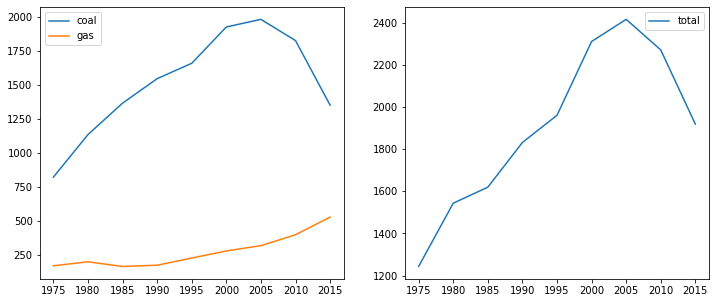

In [30]:
df1 = pd.DataFrame({ 'coal': coal_y, 'gas': gas_y }, index=years_x)
df2 = pd.DataFrame({ 'total': total_y }, index=years_x)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

df1.plot(ax=ax1);
df2.plot(ax=ax2);

### Plot types

#### Scatter Plot

Type of plot using Cartesian coordinates (x, y) to display values one (or multiple) set(s) of data.

👉 matplotlib.pyplot.scatter

Let's plot the relationship between Views & Likes of Trending Youtube Videos of 2019

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

Text(0, 0.5, 'Likes')

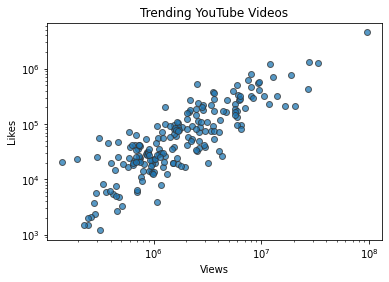

In [31]:
data = pd.read_csv('data/youtube.csv')

plt.scatter(data['views'], data['likes'], edgecolor='#333333', alpha=0.75)

plt.xscale('log')
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('Views')
plt.ylabel('Likes')

#### Bar Plot

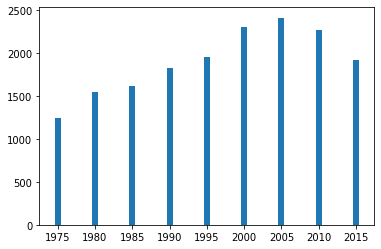

In [32]:
plt.bar(years_x, total_y);

##### With Pandas

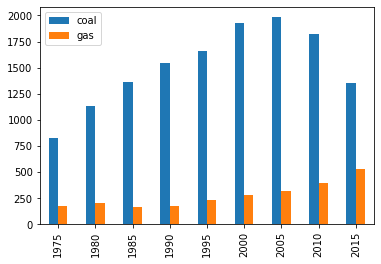

In [33]:
# with pandas
df.plot(kind='bar');

#### Histogram

A histogram is an accurate representation of the distribution of numerical data. We can use the matplotlib.pyplot.hist function

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

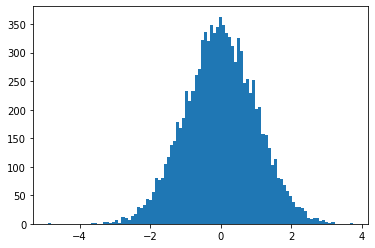

In [34]:
import numpy as np

x = np.random.normal(size=10_000) # Randomly pick 10_000 numbers

plt.hist(x, bins=100); # Horizontal axis are the frequencies of each bin.

## Seaborn

A Python data visualization library built on top of matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Official page:

https://seaborn.pydata.org/

https://seaborn.pydata.org/examples/index.html

In [35]:
!pip install --quiet seaborn

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
tips_df = sns.load_dataset('tips')
# tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
tips_df.shape

(244, 7)

In [38]:
tips_df.head(5)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

### One numeric variable (univariate)

We can use one of:

    Histogram
    Density plot

In Seaborn, we use histplot

🤔 Can you plot the distribution of the numeric variable total_bill?

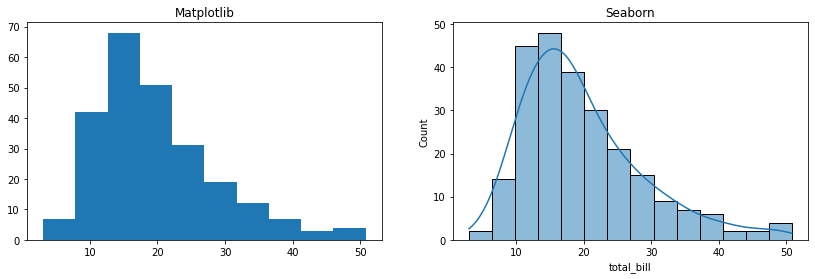

In [39]:
plt.figure(figsize=(14, 4))

# Using Matplotlib
plt.subplot(1, 2, 1)
plt.title('Matplotlib')
plt.hist(tips_df['total_bill'])

# Using Seaborn
plt.subplot(1, 2, 2)
plt.title('Seaborn')
sns.histplot(tips_df['total_bill'], kde=True);

### One categorical variable

We can use one of:

    Barplot
    Pie/Doughnut charts (👎)

In Seaborn, we use countplot

🤔 Are there more smokers than non-smokers in this restaurant clientele?

https://seaborn.pydata.org/generated/seaborn.countplot.html

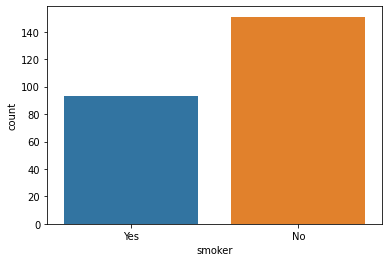

In [40]:
sns.countplot(x="smoker", data=tips_df);

### Two categorical variables

🤔 Are there more smokers at Lunch?

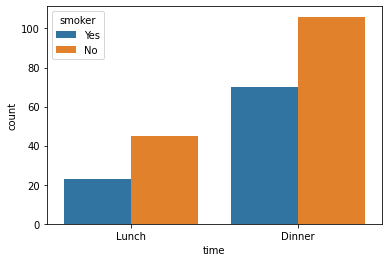

In [41]:
sns.countplot(x="time", hue="smoker", data=tips_df);

### One Numeric + One Categorical

We can use one of:

    Scatter plots
    Distribution plots (box, violin, etc.)

In Seaborn, we will use the unified API of seaborn.catplot

https://seaborn.pydata.org/generated/seaborn.catplot.html

#### Categorical Scatter plot

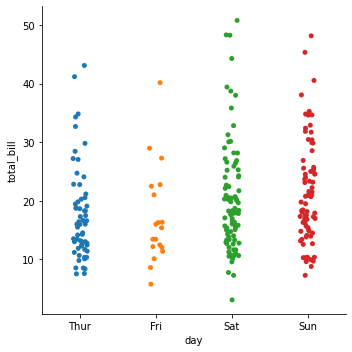

In [42]:
sns.catplot(x='day', y='total_bill', data=tips_df);

#### Categorical distribution plots

🤔 What day do people spend the most money in average at this restaurant?

Try using a seaborn.catplot with kind: 

    bar 
    box 
    violin
    boxen

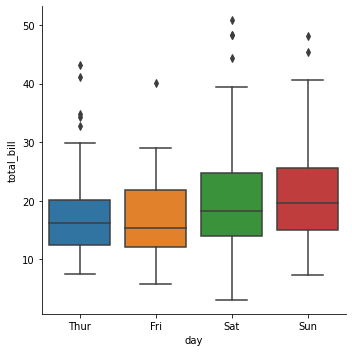

In [43]:
sns.catplot(x='day', y='total_bill', data=tips_df, kind="box");

### Two numeric variables (bivariate)

One can be x, the other can be y allowing to visualize statistical relationship.

#### Scatterplot

🤔 What is the relationship between the tip and the total_bill?

Let's use seaborn.scatterplot

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

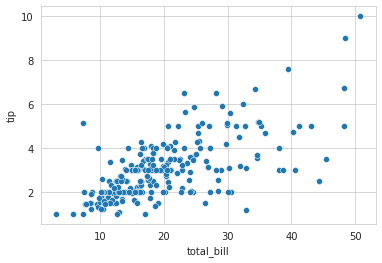

In [44]:
with sns.axes_style('whitegrid'): 
    # sns.set(style="whitegrid") for global change
    sns.scatterplot(x="total_bill", y="tip", data=tips_df);

#### Regression

https://seaborn.pydata.org/generated/seaborn.regplot.html

👉 Read more about visualizing linear relationships in Seaborn's documentation

https://seaborn.pydata.org/tutorial/regression.html

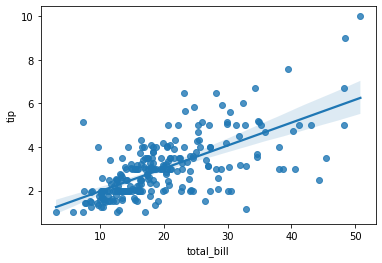

In [45]:
sns.regplot(x='total_bill', y='tip', data=tips_df);

#### 💪 (3 numerical + 1 categorical) variables in 1 graph ??

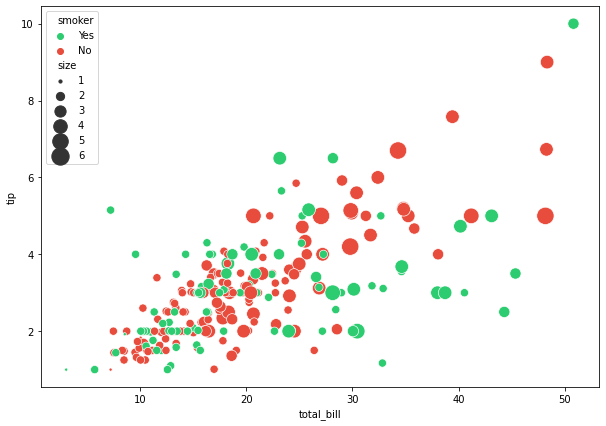

In [46]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="total_bill", y="tip", hue='smoker', size="size",
                palette=sns.color_palette(["#2ecc71", "#e74c3c"]),
                sizes=(10, 300), data=tips_df);

### Facet grid - lets you plot the graph of your choice by groups

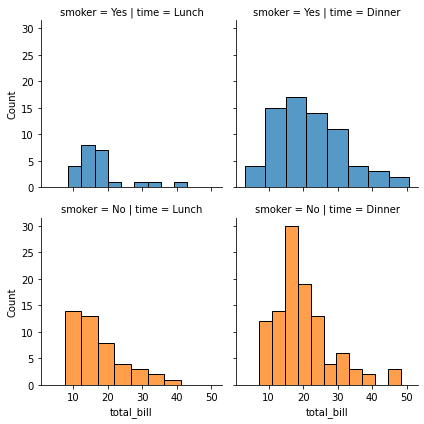

In [47]:
# Create a grid
g = sns.FacetGrid(tips_df, col="time", row="smoker", hue="smoker") 

# Plot a graph in each grid element
g.map(sns.histplot, "total_bill");

### Pair plots to automatically identify all correlations in a DataFrame

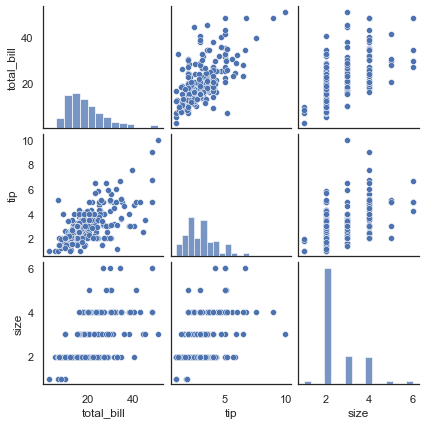

In [50]:
sns.set(style='white')
sns.pairplot(tips_df, height=2)
plt.show()

### Seaborn - Cheat sheets

https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf

## Le Wagon - Cheat Sheet

In [ ]:
# LINE PLOTS
plt.plot(x=df.col1, y=df.col2, c='red', ls='--', lw='0.5')
sns.lineplot(data=df, x='col1', y='col2', hue='col3', size='col4')

# DISTRIBUTIONS
plt.hist()   
sns.histplot()
sns.kdeplot()
sns.jointplot()

# SCATTER PLOTS
plt.scatter()
sns.scatterplot()
sns.regplot()

# COUNT PLOTS
sns.countplot() 

# CAT PLOTS
plt.bar() # eq. plt.plot(kind=‘bar’)
sns.barplot() # eq. catplot(kind=“bar”)
sns.violinplot() # eq. catplot(kind=“violin”)
sns.boxplot() # eq. catplot(kind=“box”)

# FACET GRID
g = sns.FacetGrid(data=df, col='col1')
g.map(plt.hist, 'col2')

# DATAFRAME-LEVEL MULTI CORRELATIONS
sns.heatmap(df.corr())
sns.pairplot(hue='')

## 2D HISTOGRAMS
plt.hist2d()
plt.colorbar()
sns.jointplot(x,y, kind='kde', data=df)

## 2D PROJECTION
plt.contour(X,Y,Z) # iso lines
plt.contourf(X,Y,Z=f(X,Y)) # area colors

## Plotly

Building interactive graphs (JavaScript!)

https://plot.ly/python/

https://plotly.com/python/bubble-charts/

In [ ]:
!pip install --quiet plotly

In [ ]:
# Canonical import
import plotly.express as px

### Scatter Plot

In [ ]:
tips = px.data.tips()
fig = px.scatter(tips, x="total_bill", y="tip", size="size", color="smoker")
fig.show();

## Examples

In [51]:
gdp_df = pd.read_csv('data/4_ThreeNum.csv')
gdp_df.head()

country continent  lifeExp       pop     gdpPercap
0  Afghanistan      Asia   43.828  31889923    974.580338
1      Albania    Europe   76.423   3600523   5937.029526
2      Algeria    Africa   72.301  33333216   6223.367465
3       Angola    Africa   42.731  12420476   4797.231267
4    Argentina  Americas   75.320  40301927  12779.379640

In [52]:
gdp_df.describe()

lifeExp           pop     gdpPercap
count  142.000000  1.420000e+02    142.000000
mean    67.007423  4.402122e+07  11680.071820
std     12.073021  1.476214e+08  12859.937337
min     39.613000  1.995790e+05    277.551859
25%     57.160250  4.508034e+06   1624.842248
50%     71.935500  1.051753e+07   6124.371108
75%     76.413250  3.121004e+07  18008.835640
max     82.603000  1.318683e+09  49357.190170

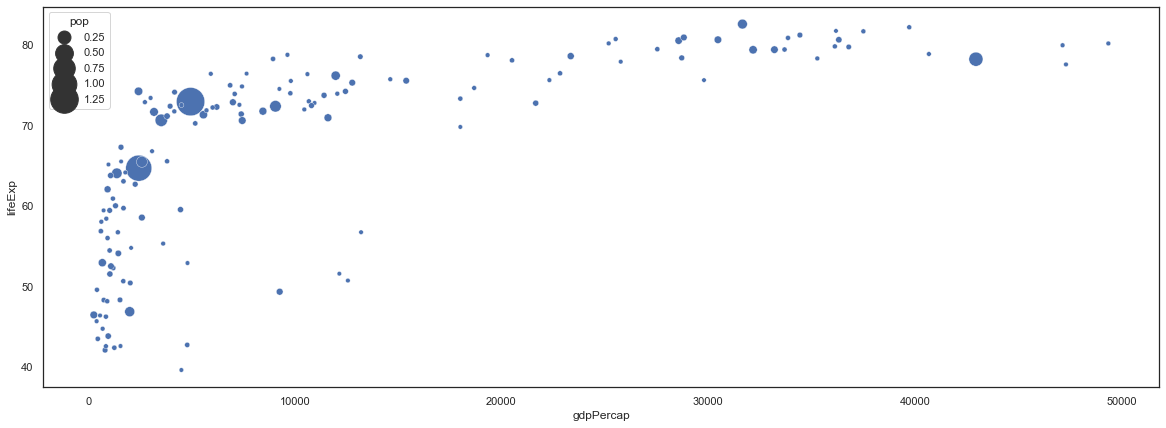

In [53]:
plt.figure(figsize=(20, 7))
sns.scatterplot(x="gdpPercap", y="lifeExp", data=gdp_df, size='pop', sizes=(20,800));

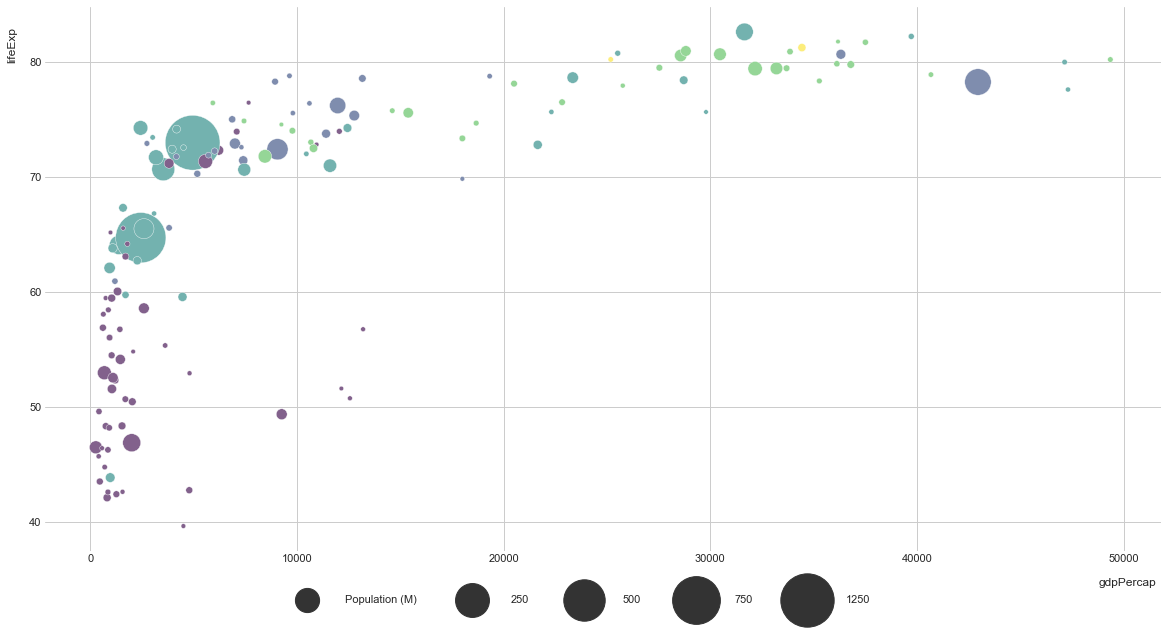

In [54]:
colors = ['#73B2AF','#95D697', '#82618C',  '#7F8DAE', '#FCED7C']
#['Gulf Stream','Granny Smith Apple', 'French lilac', 'Ship Cove', 'Yellow']
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(
    x="gdpPercap",
    y="lifeExp",
    hue="continent",
    data=gdp_df,
    size="pop",
    sizes=(20, 3000),
    palette=sns.color_palette(colors)
)
sns.despine(top=True, bottom=True, left=True, right=True)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.grid(visible=True)
ax.tick_params(axis=u'both', which=u'both',length=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[-5:], ('Population (M)','250','500','750','1250'), bbox_to_anchor=(0.2, -.15, 1., .102), loc='lower left',
           ncol=5, borderpad=2, frameon=False, handletextpad=2.5, columnspacing=4);

Label all the countries that have life expectancy below 65 and gdp per capita above 5000

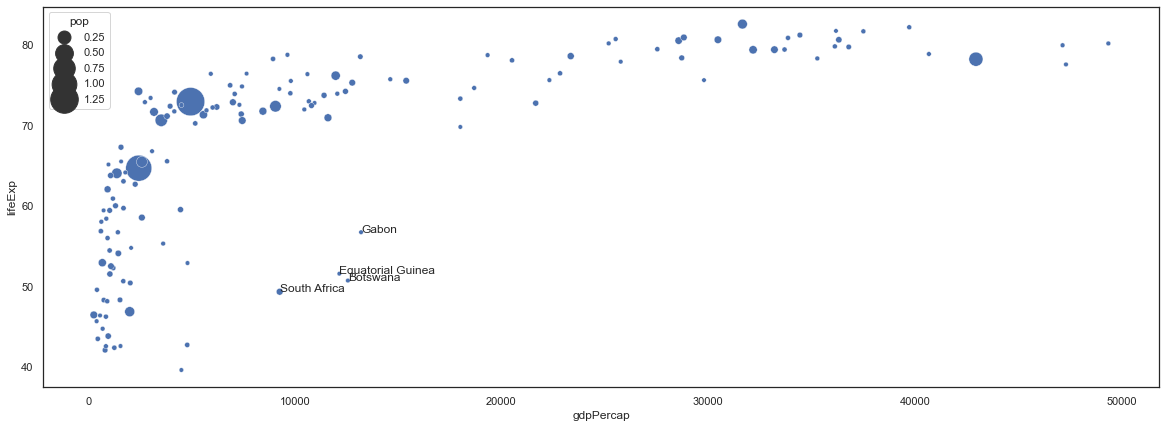

In [55]:
plt.figure(figsize=(20, 7))
sns.scatterplot(x="gdpPercap", y="lifeExp", data=gdp_df, size='pop', sizes=(20,800));

for index, country in gdp_df.iterrows():
    if country['lifeExp'] <= 65 and country['gdpPercap'] >= 5000:
        plt.text(country['gdpPercap'],country['lifeExp'],country['country'])

<Figure size 1440x720 with 0 Axes>

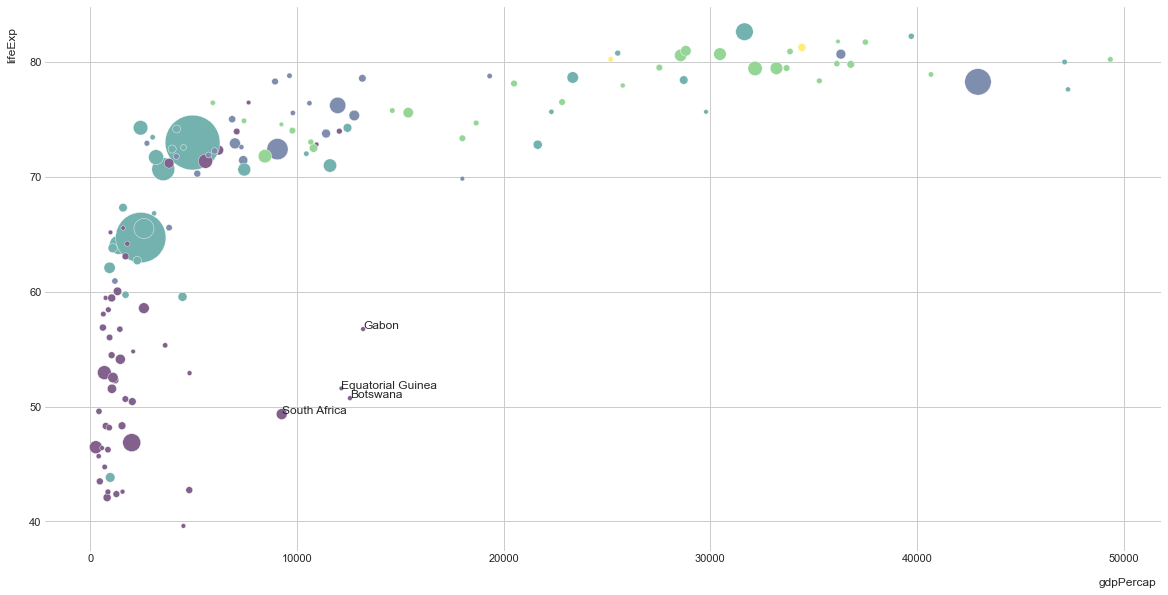

In [56]:
plt.figure(figsize=(20, 10))
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(
    x="gdpPercap",
    y="lifeExp",
    hue="continent",
    data=gdp_df,
    size="pop",
    sizes=(20, 3000),
    palette=sns.color_palette(colors)
)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_label_coords(0.97, -0.05)
ax.yaxis.set_label_coords(-0.025, 0.93)
ax.grid(visible=True)
ax.tick_params(axis=u'both', which=u'both',length=0)
handles, labels = ax.get_legend_handles_labels()

ax.legend_.remove()

for idx, row in gdp_df.iterrows():
    if row["gdpPercap"] > 5000 and row["lifeExp"] < 65:
        ax.text(row["gdpPercap"], row["lifeExp"], row["country"])

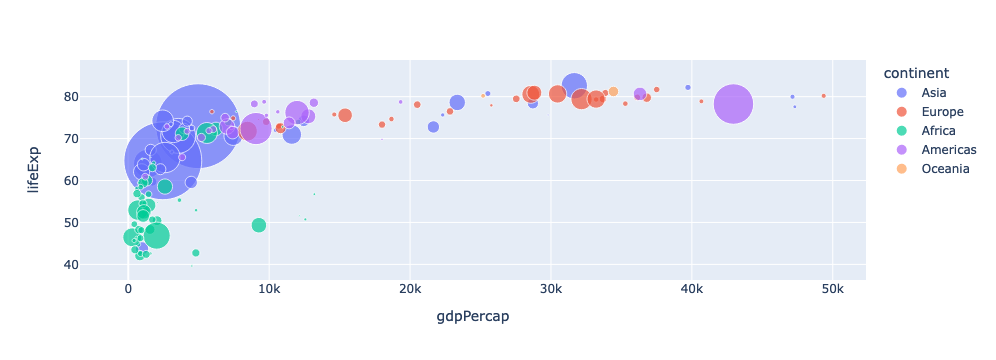

In [61]:
fig = px.scatter(
    gdp_df,
    x="gdpPercap",
    y="lifeExp",
    size="pop",
    color="continent",
    hover_name="country",
    size_max=60,
)
fig.show()

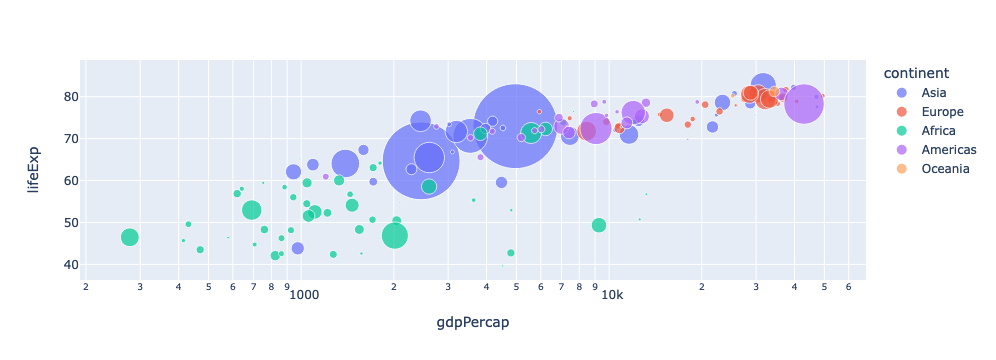

In [62]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), 
                 x="gdpPercap", 
                 y="lifeExp",
                 size="pop", 
                 color="continent",
                 hover_name="country", 
                 log_x=True, 
                 size_max=60)
fig.show()